 # Titanic Kaggle

 ## Libraries

In [140]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [141]:
data=pd.read_csv("titanic.csv")

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
#Using drop function to exclude collums I won't need. The parameter inplace true will change the table 
data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [144]:
# To define X I can simply drop the collumn I don't need, which is the Y 
# Here I am not using the parameter inplace, thus it is automaticaly set as "False" and doesn't change the table
X = data.drop(["Survived"],axis="columns")
# For the variable Y I can simply select the column Survived 
Y = data["Survived"] #Another way to declare: Y = data.Survived 
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [145]:
#The next step: create a pattern
#Pattern: Male = 0 / Female = 1
#This method map will create synonims in a dictionary
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [146]:
#Some filles with the ages are empy. Checkin out the first 10 lines
X.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [147]:
# To fix this, we will use method fillna(). Inside the brackets I'll put the information to replace, which will be the mean
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]
#Index 5 was empty and is now showing the mean (29.699118)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [149]:
#Now want data to training (80%) and testing (20%) 
#Sklearn has a method to automaticaly make this division"train_test_split"
#Parameters: X, Y, percentage. If I put one, the method will automaticaly calculate the other 
train_test_split(X,Y,train_size = 0.8) # It is automaticaly setting 0.2 for testing
# The table will show X_training [712 rows x 3 columns], X_test [179 rows x 3 columns], Y_training[Length: 712, Y_test[Length: 179]

[     Pclass  Sex        Age
 125       3    0  12.000000
 376       3    1  22.000000
 218       1    1  32.000000
 13        3    0  39.000000
 475       1    0  29.699118
 ..      ...  ...        ...
 154       3    0  29.699118
 278       3    0   7.000000
 454       3    0  29.699118
 811       3    0  39.000000
 124       1    0  54.000000
 
 [712 rows x 3 columns],
      Pclass  Sex   Age
 106       3    1  21.0
 349       3    0  42.0
 651       2    1  18.0
 236       2    0  44.0
 115       3    0  21.0
 ..      ...  ...   ...
 438       1    0  64.0
 720       2    1   6.0
 570       2    0  62.0
 38        3    1  18.0
 313       3    0  28.0
 
 [179 rows x 3 columns],
 125    1
 376    1
 218    1
 13     0
 475    0
       ..
 154    0
 278    0
 454    0
 811    0
 124    0
 Name: Survived, Length: 712, dtype: int64,
 106    1
 349    0
 651    1
 236    0
 115    0
       ..
 438    0
 720    1
 570    1
 38     0
 313    0
 Name: Survived, Length: 179, dtype: int64]

In [150]:
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
len(X_train)

712

In [151]:
len(X_test)

179

In [152]:
#Note that X_test is not in order. It presents it ramdomly to prevent model from becoming biased 
X_test

,Pclass,Sex,Age
128,3,1,29.699118
16,3,0,2.000000
477,3,0,29.000000
121,3,0,29.699118
267,3,0,25.000000
...,...,...,...
655,2,0,24.000000
577,1,1,39.000000
623,3,0,21.000000
628,3,0,26.000000


# Decision tree

In [154]:
#If it is empty it will create it with as many levels it can. TO avid this we put max_dep to determine how many levels we want
#The sext parameter will be the criteria. If I dont put it will use gini. If I wanted to use entropy I'd have to put it. I want to use gini, so I don't need to put it
model = tree.DecisionTreeClassifier(max_depth=3)   #model with deph 3
model

DecisionTreeClassifier(max_depth=3)

In [155]:
#Now the method fit will adjust data, trainning the model
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [156]:
#Using predict method to test the model
model.predict(X_test) #always gets x and retuns y

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1], dtype=int64)

In [157]:
#Storing the result in a variable 
Y_pred = model.predict(X_test)
Y_test

864    0
620    0
305    1
368    1
682    0
      ..
108    0
311    1
422    0
554    1
224    1
Name: Survived, Length: 179, dtype: int64

In [158]:
#Dataframe to show Y real and Y predicted:
#Using a dictionary to separate columns  
result = pd.DataFrame({"Survided REAL": Y_test, "Survived PREDICTION": Y_pred})
result

,Survided REAL,Survived PREDICTION
864,0,1
620,0,1
305,1,0
368,1,0
682,0,0
...,...,...
108,0,0
311,1,1
422,0,0
554,1,0


In [159]:
#Measuring accuracy with method socore, which has two parameters: x test and y real 
model.score(X_test,Y_real)

0.8156424581005587

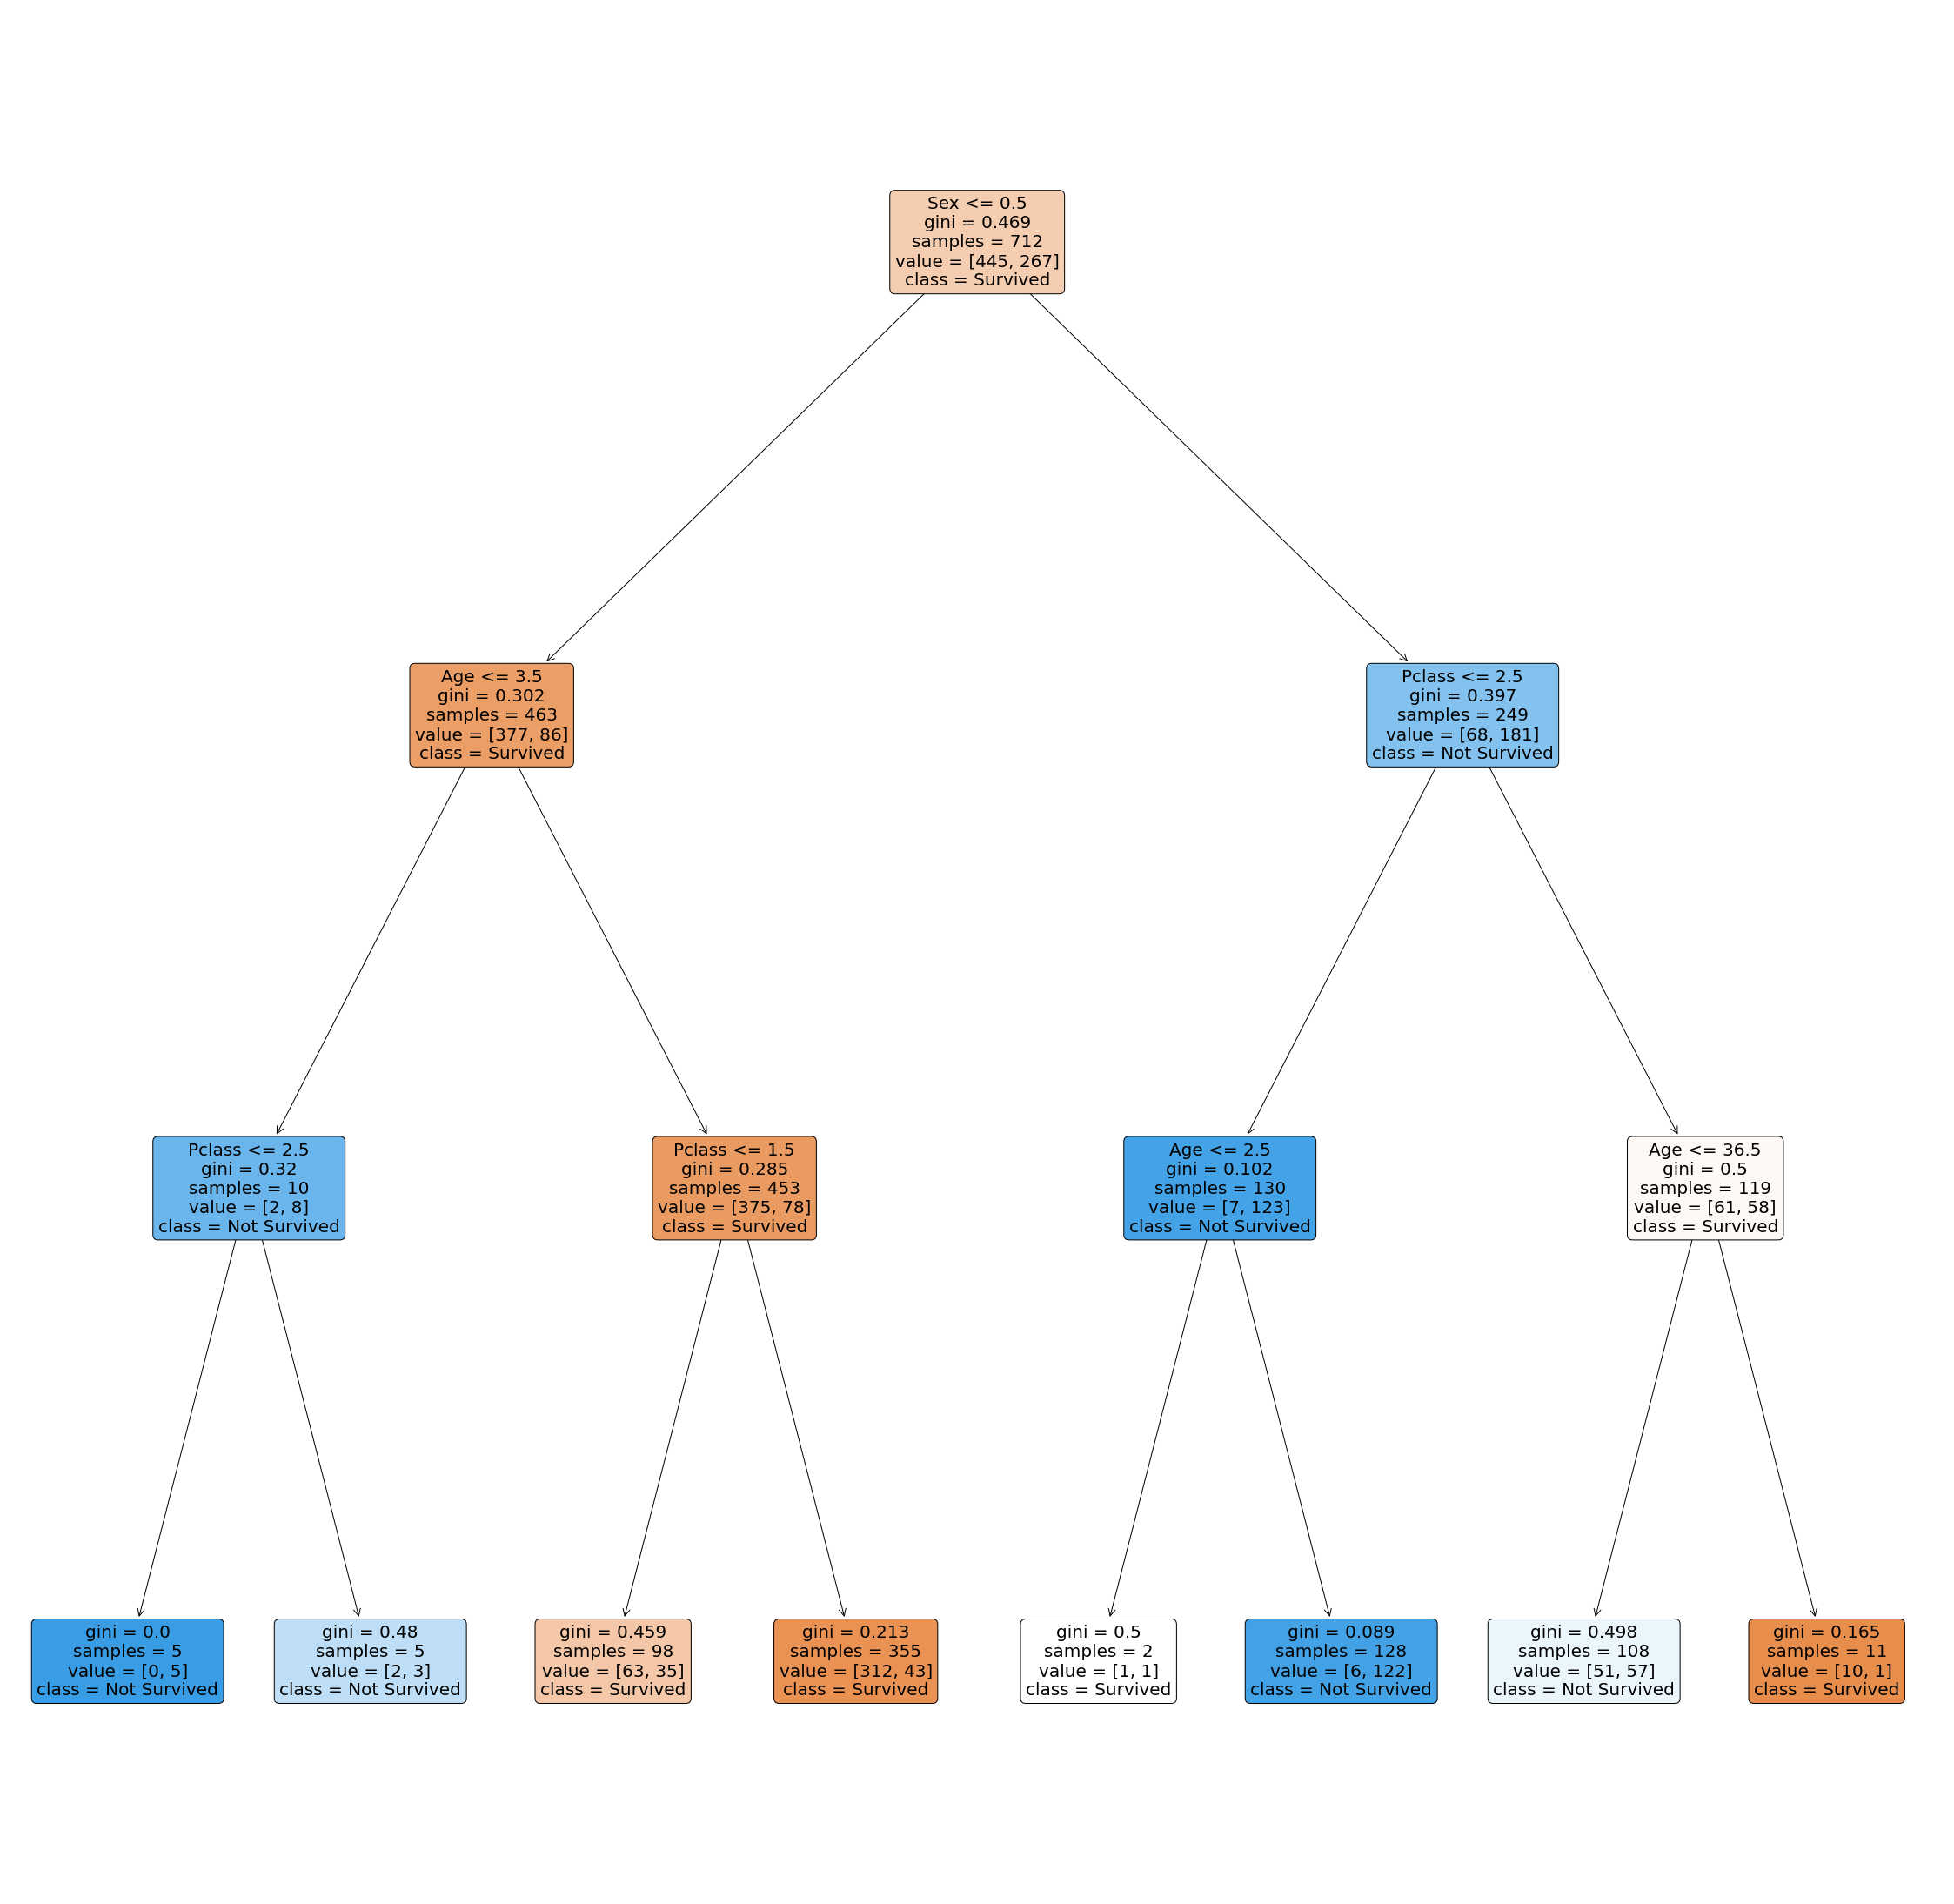

In [166]:
plt.figure(figsize=(40,40))
graph_tree = plot_tree (model,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)